In [25]:
%pip install kaggle
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("utkarshx27/passwords")

print("Path to dataset files:", path)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Path to dataset files: C:\Users\mrcch\.cache\kagglehub\datasets\utkarshx27\passwords\versions\1


In [26]:
%pip install xgboost
%pip install lightgbm 

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Styling
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
COLORS = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, 
                             auc, accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Statistical Analysis
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr

print("✅ All libraries imported successfully!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
✅ All libraries imported successfully!
📦 Pandas version: 2.1.1
📦 NumPy version: 1.25.2


In [27]:
import os


csv_files = [f for f in os.listdir(path) if f.lower().endswith('.csv')]
if not csv_files:
    raise FileNotFoundError("❌ No CSV files found in the specified directory!")

csv_path = os.path.join(path, csv_files[0])

df = pd.read_csv(csv_path)


# Display basic information
print("="*70)
print(csv_files[0], " DATASET")
print("="*70)

print(f"🧾 Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns")
print(f"🧩 Columns: {', '.join(df.columns)}")
print("\n📋 Data Types:")
print(df.dtypes)
print("="*70)

# First look at the data
df.head(10)

passwords.csv  DATASET
🧾 Shape: 507 rows × 9 columns
🧩 Columns: rank, password, category, value, time_unit, offline_crack_sec, rank_alt, strength, font_size

📋 Data Types:
rank                 float64
password              object
category              object
value                float64
time_unit             object
offline_crack_sec    float64
rank_alt             float64
strength             float64
font_size            float64
dtype: object


,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0
5,6.0,12345,simple-alphanumeric,1.85,minutes,1.110000e-06,6.0,4.0,8.0
6,7.0,dragon,animal,3.72,days,3.210000e-03,7.0,8.0,11.0
7,8.0,baseball,sport,6.91,years,2.170000e+00,8.0,4.0,8.0
8,9.0,football,sport,6.91,years,2.170000e+00,9.0,7.0,11.0
9,10.0,letmein,password-related,3.19,months,8.350000e-02,10.0,8.0,11.0


In [28]:
print(" Basic Info")
print("="*50)
df.info()
print("="*50)

print("\n Quick Statistics")
display(df.describe(include='all').transpose())
print("="*50)

missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("\n Missing values by column:\n")
display(missing.to_frame("Missing Count"))
print("="*50)

df.info()
df.describe(include='all').transpose().head(10)
df.head(5)

 Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               500 non-null    float64
 1   password           500 non-null    object 
 2   category           500 non-null    object 
 3   value              500 non-null    float64
 4   time_unit          500 non-null    object 
 5   offline_crack_sec  500 non-null    float64
 6   rank_alt           500 non-null    float64
 7   strength           500 non-null    float64
 8   font_size          500 non-null    float64
dtypes: float64(6), object(3)
memory usage: 35.8+ KB

 Quick Statistics


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rank,500.0,NaN,NaN,NaN,250.5,144.481833,1.0,125.75,250.5,375.25,500.0
password,500,500,password,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,500,10,name,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,500.0,NaN,NaN,NaN,5.60266,8.436005,1.29,3.43,3.72,3.72,92.27
time_unit,500,7,days,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
offline_crack_sec,500.0,NaN,NaN,NaN,0.50001,2.658132,0.0,0.00321,0.00321,0.0835,29.27
rank_alt,500.0,NaN,NaN,NaN,251.224,145.052163,1.0,125.75,251.5,376.25,502.0
strength,500.0,NaN,NaN,NaN,7.432,5.415536,0.0,6.0,7.0,8.0,48.0
font_size,500.0,NaN,NaN,NaN,10.298,3.651282,0.0,10.0,11.0,11.0,28.0



 Missing values by column:



,Missing Count
rank,7
password,7
category,7
value,7
time_unit,7
offline_crack_sec,7
rank_alt,7
strength,7
font_size,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               500 non-null    float64
 1   password           500 non-null    object 
 2   category           500 non-null    object 
 3   value              500 non-null    float64
 4   time_unit          500 non-null    object 
 5   offline_crack_sec  500 non-null    float64
 6   rank_alt           500 non-null    float64
 7   strength           500 non-null    float64
 8   font_size          500 non-null    float64
dtypes: float64(6), object(3)
memory usage: 35.8+ KB


,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0


In [29]:
df_clean = df.dropna()
df_clean = df_clean.drop(columns=['font_size'])
print(df_clean.shape)

missing = df_clean.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("\n Missing values by column:\n")
display(missing.to_frame("Missing Count"))
print("="*50)

(500, 8)

 Missing values by column:



,Missing Count


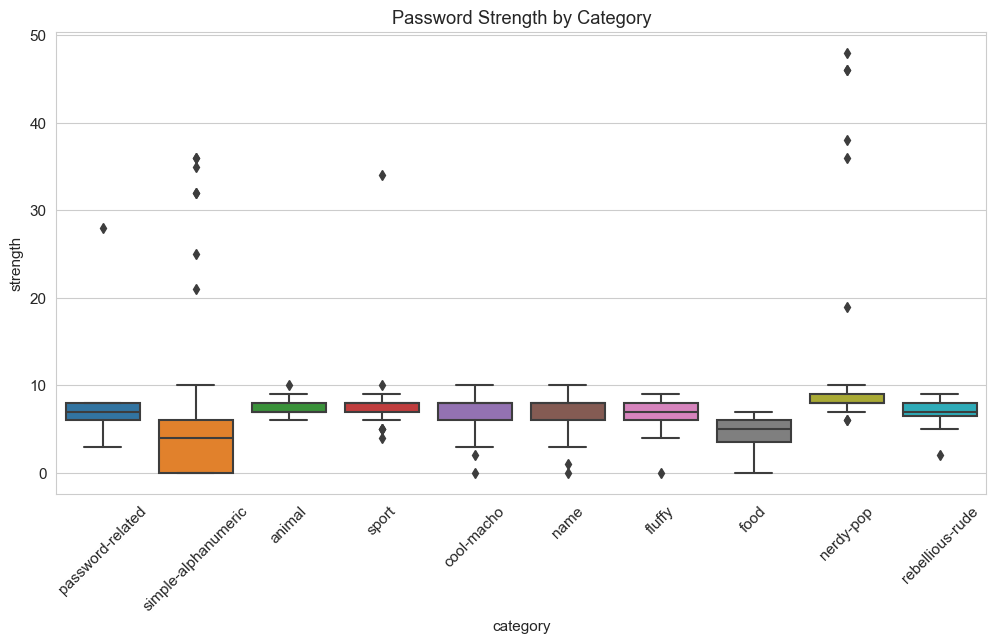

In [30]:
sns.boxplot(x='category', y='strength', data=df_clean)
plt.xticks(rotation=45)
plt.title('Password Strength by Category')
plt.show()

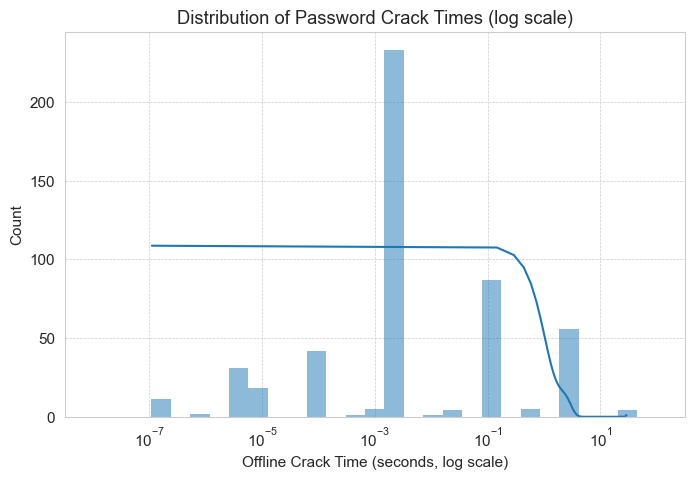

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['offline_crack_sec'], bins=np.logspace(-8, 2, 30), kde=True)
plt.xscale('log')
plt.xlabel("Offline Crack Time (seconds, log scale)")
plt.ylabel("Count")
plt.title("Distribution of Password Crack Times (log scale)")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

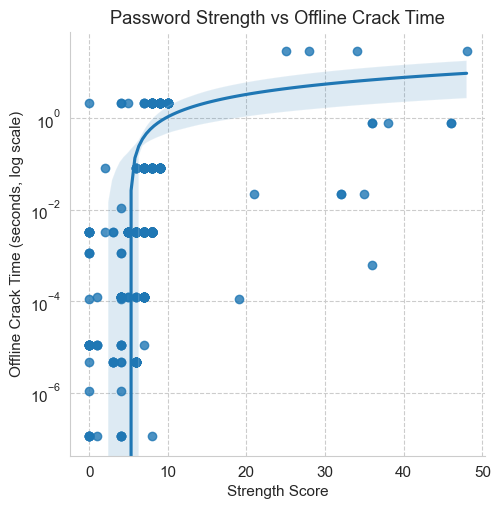

In [32]:
sns.lmplot(x='strength', y='offline_crack_sec', data=df_clean)
plt.yscale('log')
plt.title("Password Strength vs Offline Crack Time")
plt.xlabel("Strength Score")
plt.ylabel("Offline Crack Time (seconds, log scale)")
plt.grid(True, which='both', ls='--')
plt.show()

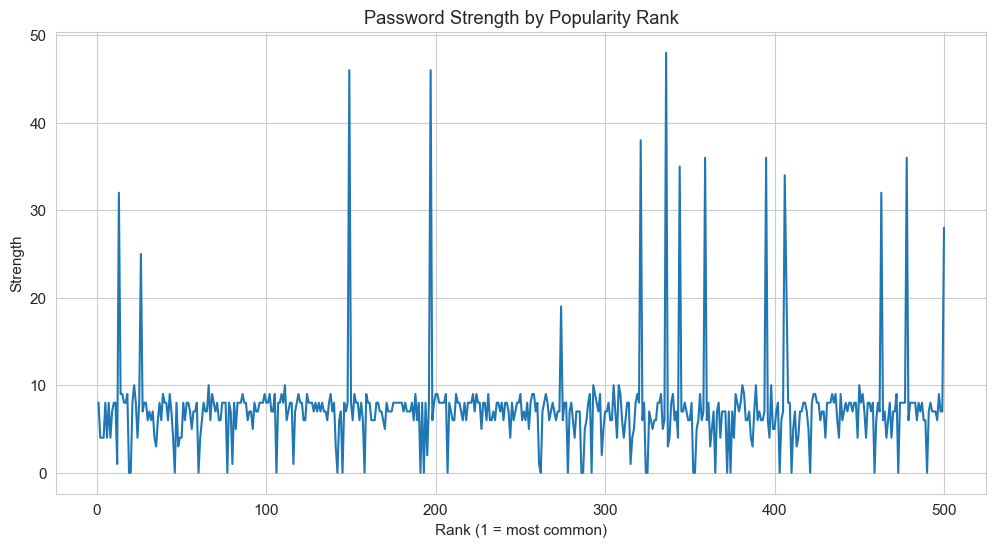

In [33]:
sns.lineplot(x='rank', y='strength', data=df_clean)
plt.title("Password Strength by Popularity Rank")
plt.xlabel("Rank (1 = most common)")
plt.ylabel("Strength")
plt.show()

In [34]:
df_clean['length'] = df_clean['password'].str.len()
df_clean['has_upper'] = df_clean['password'].str.contains(r'[A-Z]').astype(int)
df_clean['has_lower'] = df_clean['password'].str.contains(r'[a-z]').astype(int)
df_clean['has_digit'] = df_clean['password'].str.contains(r'\d').astype(int)
df_clean['has_symbol'] = df_clean['password'].str.contains(r'[^A-Za-z0-9]').astype(int)
df_clean['num_digits'] = df_clean['password'].str.count(r'\d')
df_clean['num_symbols'] = df_clean['password'].str.count(r'[^A-Za-z0-9]')

print('Columns: ', df_clean.columns)

Columns:  Index(['rank', 'password', 'category', 'value', 'time_unit',
       'offline_crack_sec', 'rank_alt', 'strength', 'length', 'has_upper',
       'has_lower', 'has_digit', 'has_symbol', 'num_digits', 'num_symbols'],
      dtype='object')


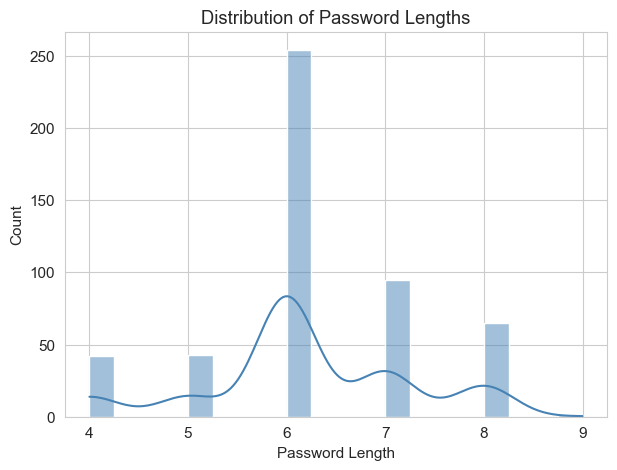

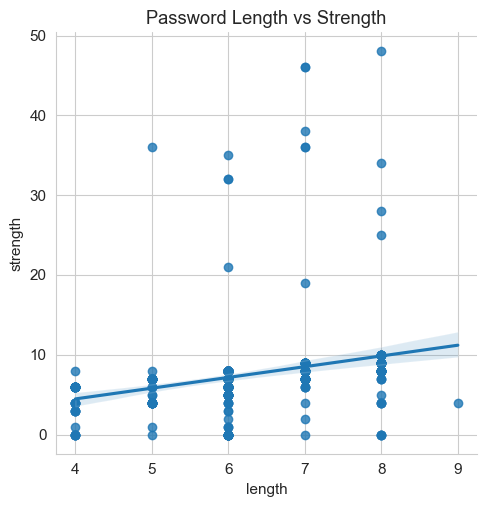

In [35]:
plt.figure(figsize=(7,5))
sns.histplot(df_clean['length'], bins=20, kde=True, color='steelblue')
plt.title("Distribution of Password Lengths")
plt.xlabel("Password Length")
plt.ylabel("Count")
plt.show()

sns.lmplot(x='length', y='strength', data=df_clean)
plt.title("Password Length vs Strength")
plt.show()

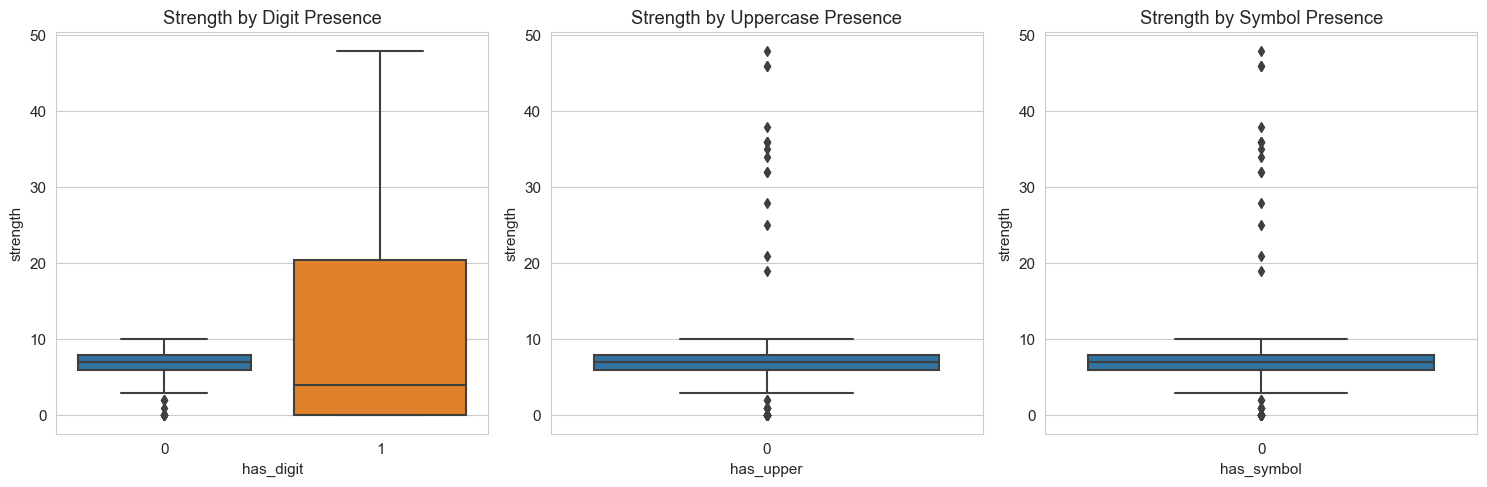

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.boxplot(x='has_digit', y='strength', data=df_clean, ax=axes[0])
axes[0].set_title("Strength by Digit Presence")

sns.boxplot(x='has_upper', y='strength', data=df_clean, ax=axes[1])
axes[1].set_title("Strength by Uppercase Presence")

sns.boxplot(x='has_symbol', y='strength', data=df_clean, ax=axes[2])
axes[2].set_title("Strength by Symbol Presence")

plt.tight_layout()
plt.show()

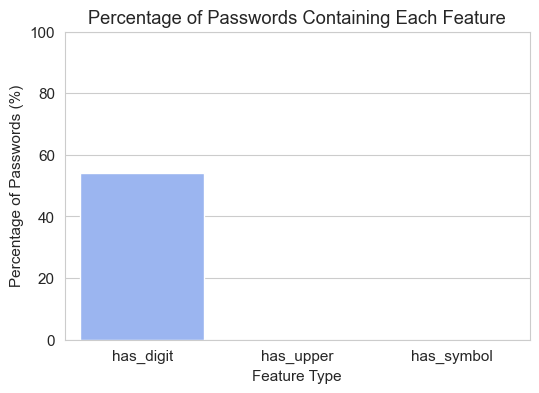

In [37]:
df_clean[['has_upper', 'has_digit', 'has_symbol']].sum() / len(df_clean) * 100

feature_presence = (
    df_clean[['has_upper', 'has_digit', 'has_symbol']]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
sns.barplot(x=feature_presence.index, y=feature_presence.values, palette="coolwarm")
plt.title("Percentage of Passwords Containing Each Feature")
plt.ylabel("Percentage of Passwords (%)")
plt.xlabel("Feature Type")
plt.ylim(0, 100)
plt.show()

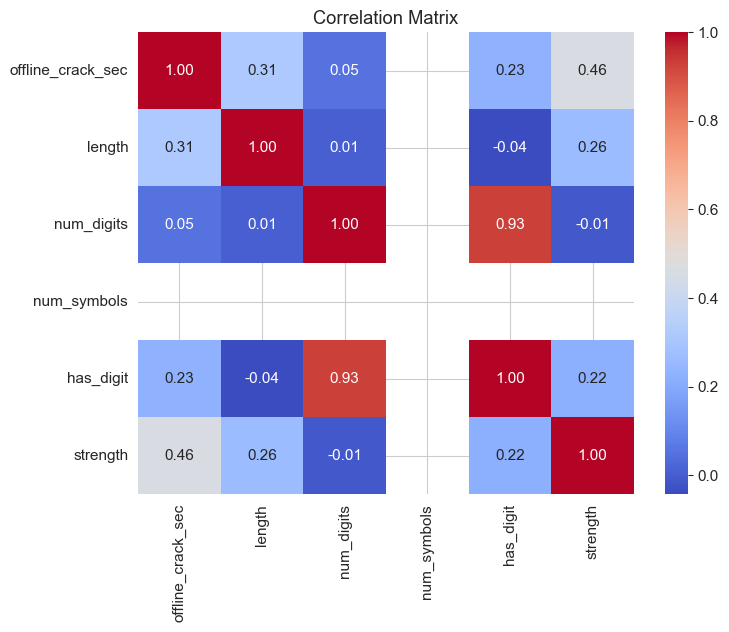

In [38]:
corr = df_clean[['offline_crack_sec', 'length', 'num_digits', 'num_symbols','has_digit', 'strength']].corr()
plt.figure(figsize=[8,6])
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

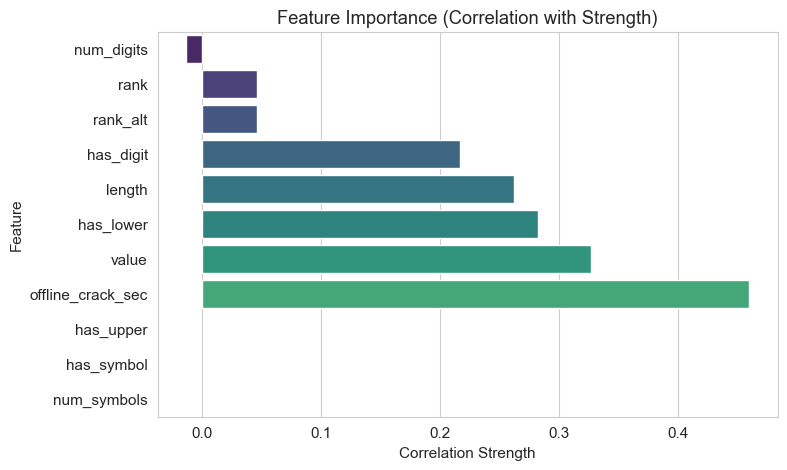

In [39]:
corr_with_target = (
    df_clean.corr(numeric_only=True)['strength']
    .drop('strength')
    .sort_values(ascending=True)
)



plt.figure(figsize=(8,5))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="viridis")
plt.title("Feature Importance (Correlation with Strength)")
plt.xlabel("Correlation Strength")
plt.ylabel("Feature")
plt.show()

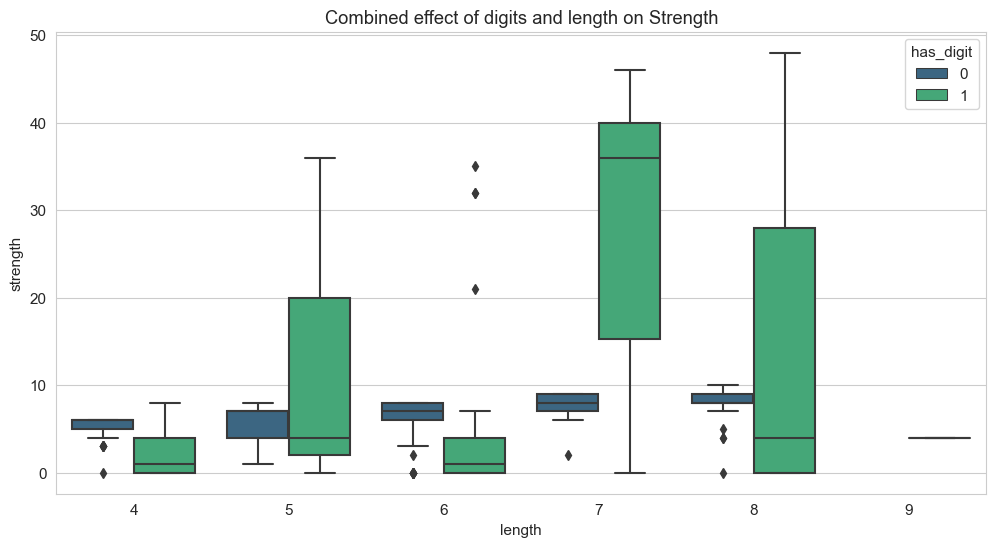

In [40]:
sns.boxplot(
    x='length', y='strength',
    hue='has_digit', data=df_clean,
    palette='viridis'
)
plt.title('Combined effect of digits and length on Strength')
plt.show()

In [41]:
X = df_clean[['rank', 'length', 'num_digits', 'has_digit', 'has_lower']]
y = df_clean['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_

for name, imp in sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True):
    print(f"{name:15s}: {imp:.3f}")
    
print('='*70)
y_pred = model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

has_lower      : 0.301
has_digit      : 0.262
num_digits     : 0.255
rank           : 0.138
length         : 0.043
R² Score: 0.882
MAE: 1.44


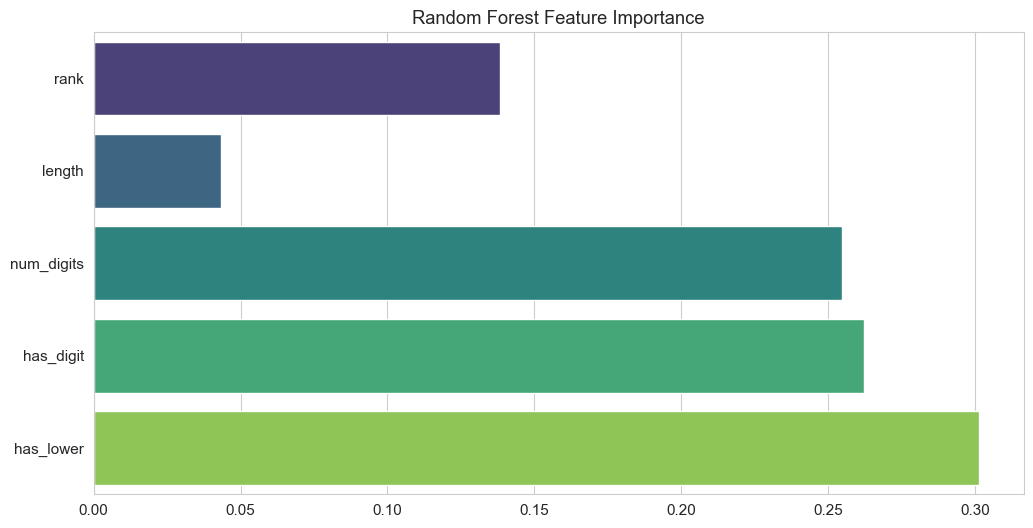

In [42]:
sns.barplot(x=model.feature_importances_, y=X.columns, orient='h', palette='viridis')
plt.title("Random Forest Feature Importance")
plt.show()

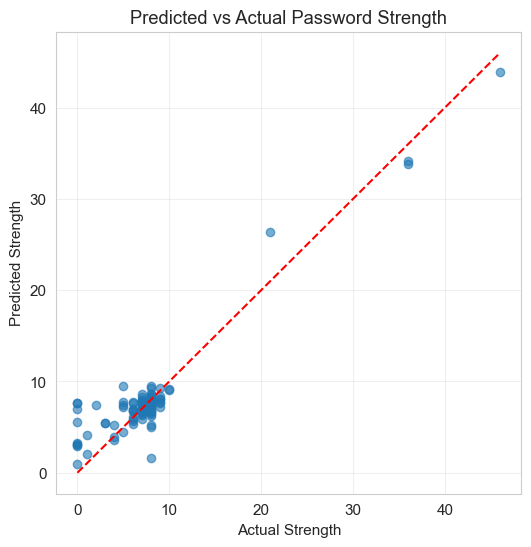

In [43]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Predicted vs Actual Password Strength")
plt.grid(True, alpha=0.3)
plt.show()

In [44]:
X = df_clean[['length', 'num_digits', 'has_digit', 'has_lower']]
y = df_clean['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_

for name, imp in sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True):
    print(f"{name:15s}: {imp:.3f}")
    
print('='*70)
y_pred = model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

has_lower      : 0.341
num_digits     : 0.334
has_digit      : 0.265
length         : 0.059
R² Score: 0.920
MAE: 1.25


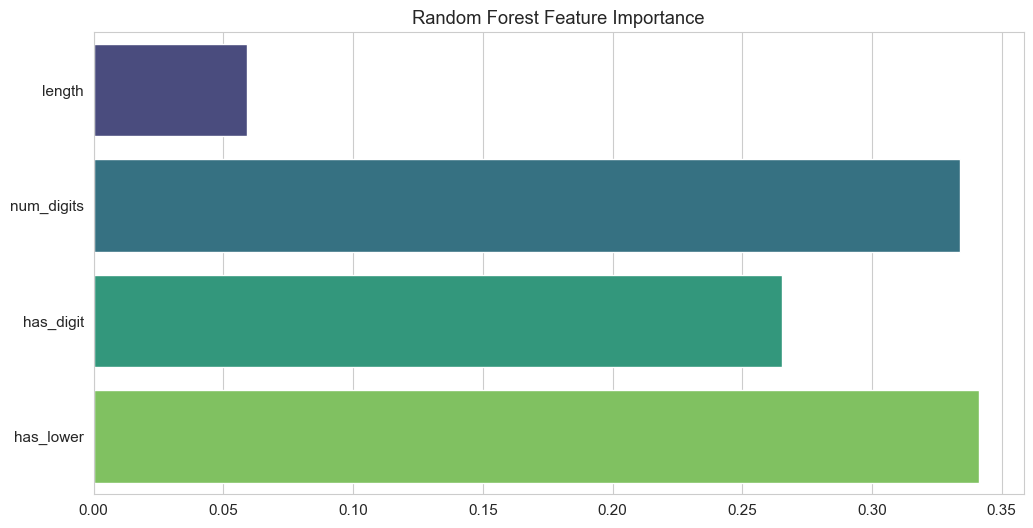

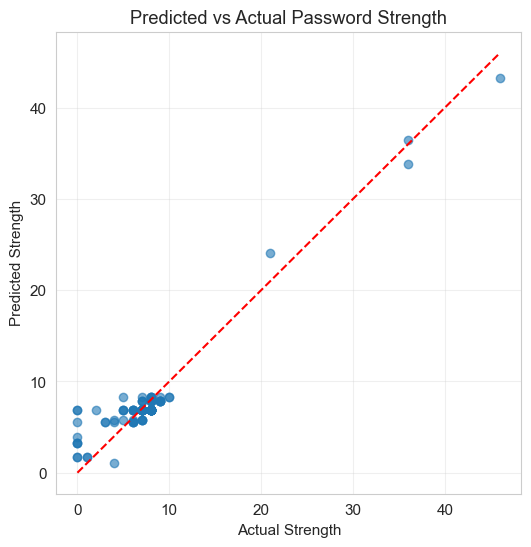

In [45]:
sns.barplot(x=model.feature_importances_, y=X.columns, orient='h', palette='viridis')
plt.title("Random Forest Feature Importance")
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Predicted vs Actual Password Strength")
plt.grid(True, alpha=0.3)
plt.show()

In [46]:
import pandas as pd
import numpy as np
import random
import string

np.random.seed(42)

df = df_clean

# --- Add Missing Values ---
# Randomly set ~5% of cells in selected columns to null
for col in ['password', 'category', 'strength', 'value']:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

# --- Add Duplicate Rows ---
# Duplicate 3% of the dataset to simulate redundancy
duplicates = df.sample(frac=0.03, random_state=1)
df_dirty = pd.concat([df, duplicates], ignore_index=True)

# --- Randomly Corrupt Text Fields ---
def random_noise(s):
    """Injects typos or random symbols into text."""
    if pd.isnull(s) or len(s) < 3:
        return s
    pos = random.randint(0, len(s)-1)
    noise = random.choice(['#', '$', '!', '*', '123', '@'])
    return s[:pos] + noise + s[pos+1:]

df_dirty.loc[df_dirty.sample(frac=0.05).index, 'password'] = (
    df_dirty['password'].sample(frac=0.05).apply(random_noise)
)

# --- Randomly Change Capitalisation in Category ---
df_dirty['category'] = df_dirty['category'].apply(
    lambda x: str(x).upper() if random.random() < 0.3 else str(x).lower()
)

# --- Insert Outliers in Numeric Fields ---
# Add unrealistic values to simulate measurement errors
outlier_indices = df_dirty.sample(frac=0.02).index
df_dirty.loc[outlier_indices, 'value'] = df_dirty['value'] * np.random.randint(1000, 5000)
df_dirty.loc[outlier_indices, 'offline_crack_sec'] = df_dirty['offline_crack_sec'] * np.random.randint(1000, 10000)

# --- Randomly Convert Some Numeric Values to Strings ---
for col in ['rank', 'strength']:
    idx = df_dirty.sample(frac=0.02).index
    df_dirty.loc[idx, col] = df_dirty.loc[idx, col].astype(str) + "_err"

# --- Shuffle Rows ---
df_dirty = df_dirty.sample(frac=1, random_state=42).reset_index(drop=True)

# --- Save the Dirty Dataset ---
df_dirty.to_csv("password_strength_dirty.csv", index=False)

print("✅ Dirty dataset created: password_strength_dirty.csv")
print(df_dirty.head(10))

✅ Dirty dataset created: password_strength_dirty.csv
    rank  password             category  value time_unit  offline_crack_sec  \
0  305.0  qwertyui  SIMPLE-ALPHANUMERIC   6.91     years           2.170000   
1  500.0  passw0rd     password-related  92.27     years          29.020000   
2  442.0  brooklyn                 name   6.91     years           2.170000   
3  154.0  internet     password-related   6.91     years           2.170000   
4  341.0    skippy                 NAME   3.72      days           0.003210   
5  132.0     black           COOL-MACHO   3.43     hours           0.000124   
6  205.0    mother                 name   3.72      days           0.003210   
7  323.0    calvin                 NAME   3.72      days           0.003210   
8  326.0    samson                 name   3.72      days           0.003210   
9  248.0    sophie                 NAME   3.72      days           0.003210   

   rank_alt strength  length  has_upper  has_lower  has_digit  has_symbol  \


In [68]:
import pandas as pd
import numpy as np

# --- Load the dirty dataset ---
df = pd.read_csv("password_strength_dirty.csv")
df_raw = df.copy()

# Column groups
NUMERIC_COLS = [
    "rank", "value", "offline_crack_sec",
    "rank_alt", "strength", "length",
    "has_upper", "has_lower", "has_digit", "has_symbol"
]
TEXT_COLS = ["password", "category", "time_unit"]

# Remove whitespace & normalize "empty" strings
for col in TEXT_COLS:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].replace(
            {"nan": np.nan, "None": np.nan, "unknown": np.nan, "": np.nan}
        )

# Fix type glitches like "12_err"

def strip_err_suffix(x):
    if isinstance(x, str) and x.endswith("_err"):
        return x.replace("_err", "")
    return x

for col in NUMERIC_COLS:
    if col in df.columns:
        df[col] = df[col].apply(strip_err_suffix)
        df[col] = pd.to_numeric(df[col], errors="coerce")


# Standardise categorical/text fields
if "category" in df.columns:
    df["category"] = df["category"].str.lower()

if "time_unit" in df.columns:
    unit_map = {
        "sec": "seconds", "second": "seconds", "seconds": "seconds", "s": "seconds",
        "min": "minutes", "minute": "minutes", "minutes": "minutes", "m": "minutes",
        "hour": "hours", "hours": "hours", "h": "hours",
        "day": "days", "days": "days", "d": "days",
        "year": "years", "years": "years", "y": "years"
    }
    df["time_unit"] = df["time_unit"].map(lambda x: unit_map.get(str(x).lower(), np.nan))


# Remove duplicates
before_dups = len(df)
df = df.drop_duplicates()
after_dups = len(df)


# Handle missing values
for col in NUMERIC_COLS:
    if col in df.columns:
        med = df[col].median(skipna=True)
        df[col] = df[col].fillna(med)

for col in ["category", "time_unit"]:
    if col in df.columns:
        df[col] = df[col].fillna("unknown")

# Drop rows with missing password or strength
df = df.dropna(subset=["password", "strength"])

# Validate numeric ranges & fix outliers
# Strength should be 1–10
df["strength"] = df["strength"].clip(lower=1, upper=10)

# Rank columns must be positive
for col in ["rank", "rank_alt"]:
    if col in df.columns:
        df.loc[df[col] <= 0, col] = np.nan
        df[col] = df[col].fillna(df[col].median())
        df[col] = df[col].round().astype(int)

# Remove extreme outliers for cracking times and values
def iqr_cap(series, k=5.0):
    q1, q3 = series.quantile(0.25), series.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - k * iqr, q3 + k * iqr
    return series.clip(lower=lower, upper=upper)

for col in ["value", "offline_crack_sec"]:
    if col in df.columns:
        df[col] = iqr_cap(df[col], k=5.0)

# Final password text cleanup
df["password"] = df["password"].astype(str).str.strip()
df = df[df["password"].str.len() > 0]

# Data quality report
def dq_report(df_before, df_after):
    return {
        "rows_before": len(df_before),
        "rows_after_dropdups": after_dups,
        "rows_after_clean": len(df_after),
        "duplicates_removed": before_dups - after_dups,
        "null_counts_after": df_after.isna().sum().to_dict(),
    }

report = dq_report(df_raw, df)
print("Data quality report:")
for k, v in report.items():
    print(f"{k}: {v}")
    
print('='*120)

print("Data Types After")
print(df.dtypes)

df.to_csv("password_strength_cleaned.csv", index=False)
print("\n Cleaned dataset saved to password_strength_cleaned.csv")

df.head(10)

Data quality report:
rows_before: 515
rows_after_dropdups: 501
rows_after_clean: 454
duplicates_removed: 14
null_counts_after: {'rank': 0, 'password': 0, 'category': 0, 'value': 0, 'time_unit': 0, 'offline_crack_sec': 0, 'rank_alt': 0, 'strength': 0, 'length': 0, 'has_upper': 0, 'has_lower': 0, 'has_digit': 0, 'has_symbol': 0, 'num_digits': 0, 'num_symbols': 0}
Data Types After
rank                   int32
password              object
category              object
value                float64
time_unit             object
offline_crack_sec    float64
rank_alt               int32
strength             float64
length                 int64
has_upper              int64
has_lower              int64
has_digit              int64
has_symbol             int64
num_digits             int64
num_symbols            int64
dtype: object

 Cleaned dataset saved to password_strength_cleaned.csv


,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,length,has_upper,has_lower,has_digit,has_symbol,num_digits,num_symbols
0,305,qwertyui,simple-alphanumeric,5.17,years,0.484950,306,10.0,8,0,1,0,0,0,0
1,500,passw0rd,password-related,5.17,years,0.484950,502,10.0,8,0,1,1,0,1,0
2,442,brooklyn,name,5.17,years,0.484950,443,8.0,8,0,1,0,0,0,0
3,154,internet,password-related,5.17,years,0.484950,154,8.0,8,0,1,0,0,0,0
4,341,skippy,name,3.72,days,0.003210,342,6.0,6,0,1,0,0,0,0
5,132,black,cool-macho,3.43,hours,0.000124,132,7.0,5,0,1,0,0,0,0
6,205,mother,name,3.72,days,0.003210,206,8.0,6,0,1,0,0,0,0
7,323,calvin,name,3.72,days,0.003210,324,8.0,6,0,1,0,0,0,0
8,326,samson,name,3.72,days,0.003210,327,7.0,6,0,1,0,0,0,0
9,248,sophie,name,3.72,days,0.003210,249,7.0,6,0,1,0,0,0,0


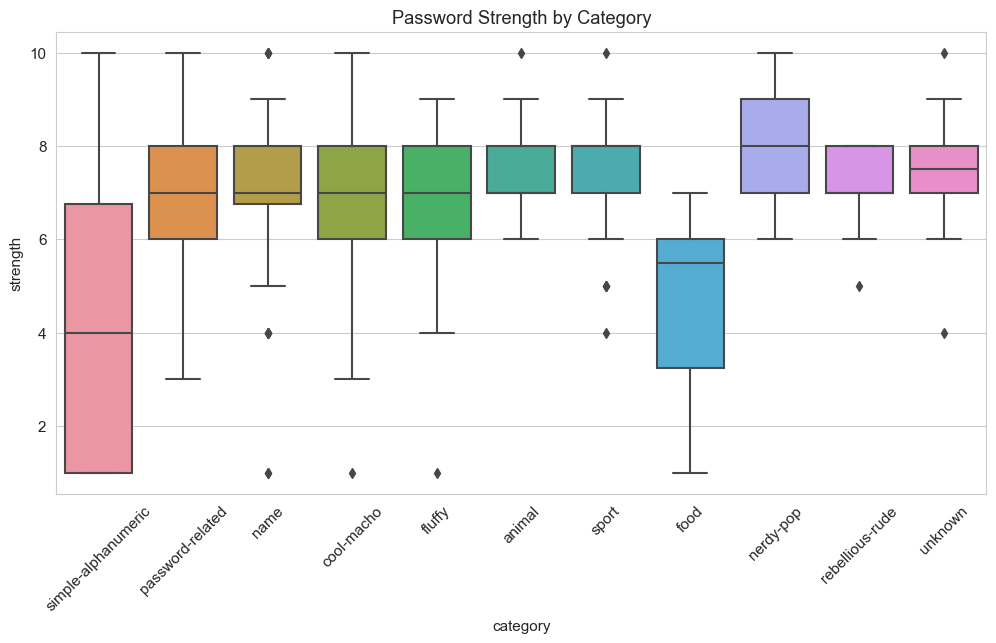

In [75]:
df = pd.read_csv('password_strength_cleaned.csv')

sns.boxplot(x='category', y='strength', data=df)
plt.xticks(rotation=45)
plt.title('Password Strength by Category')
plt.show()

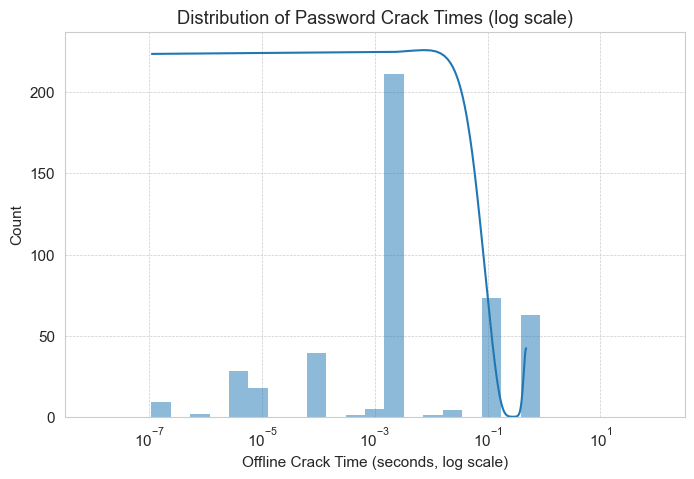

In [76]:
plt.figure(figsize=(8,5))
sns.histplot(df['offline_crack_sec'], bins=np.logspace(-8, 2, 30), kde=True)
plt.xscale('log')
plt.xlabel("Offline Crack Time (seconds, log scale)")
plt.ylabel("Count")
plt.title("Distribution of Password Crack Times (log scale)")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

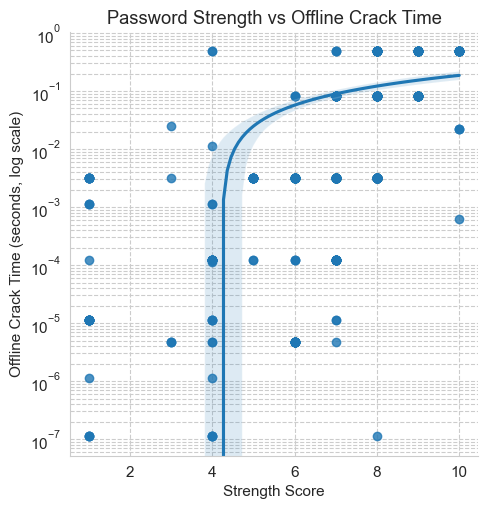

In [77]:
sns.lmplot(x='strength', y='offline_crack_sec', data=df)
plt.yscale('log')
plt.title("Password Strength vs Offline Crack Time")
plt.xlabel("Strength Score")
plt.ylabel("Offline Crack Time (seconds, log scale)")
plt.grid(True, which='both', ls='--')
plt.show()

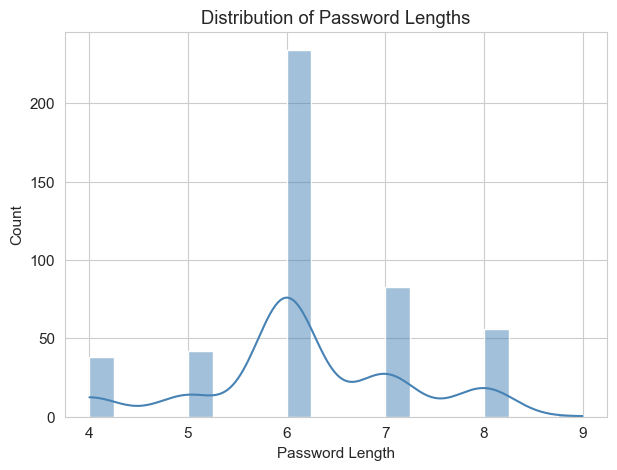

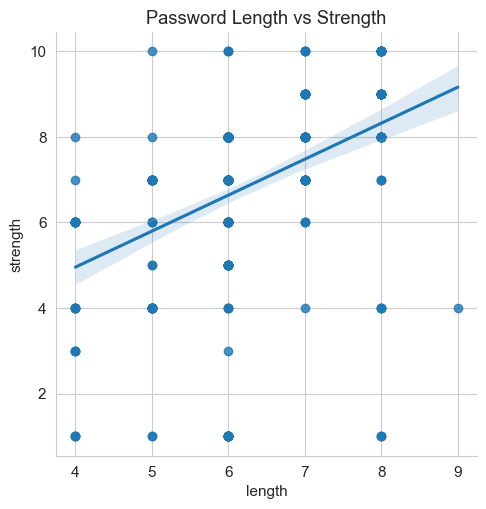

In [78]:
plt.figure(figsize=(7,5))
sns.histplot(df['length'], bins=20, kde=True, color='steelblue')
plt.title("Distribution of Password Lengths")
plt.xlabel("Password Length")
plt.ylabel("Count")
plt.show()

sns.lmplot(x='length', y='strength', data=df)
plt.title("Password Length vs Strength")
plt.show()

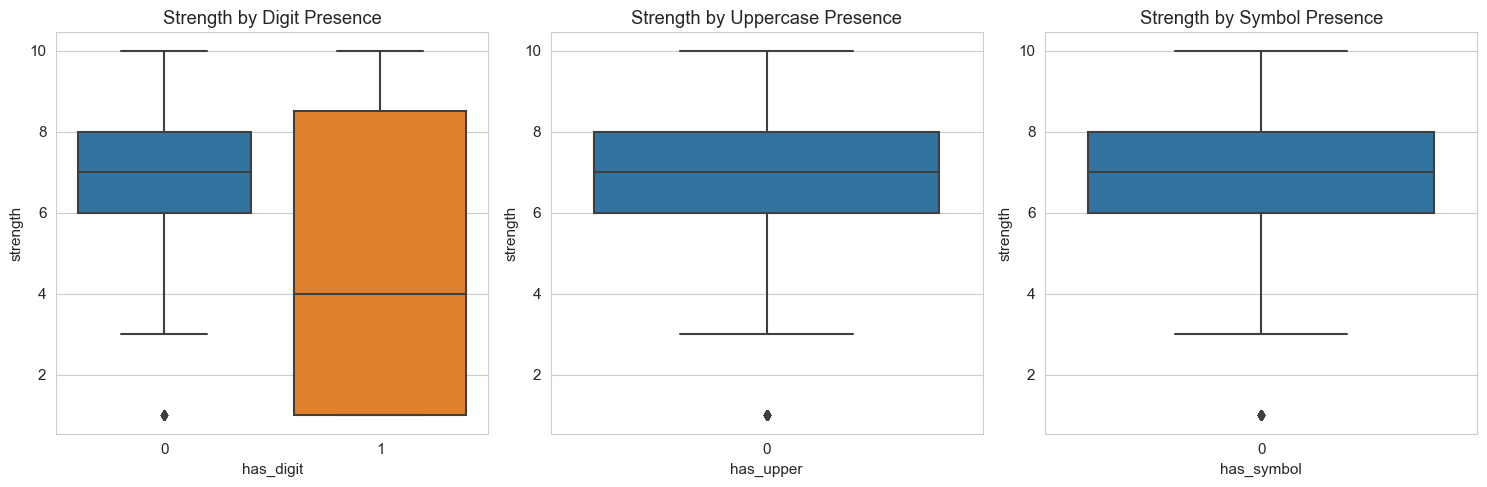

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.boxplot(x='has_digit', y='strength', data=df, ax=axes[0])
axes[0].set_title("Strength by Digit Presence")

sns.boxplot(x='has_upper', y='strength', data=df, ax=axes[1])
axes[1].set_title("Strength by Uppercase Presence")

sns.boxplot(x='has_symbol', y='strength', data=df, ax=axes[2])
axes[2].set_title("Strength by Symbol Presence")

plt.tight_layout()
plt.show()

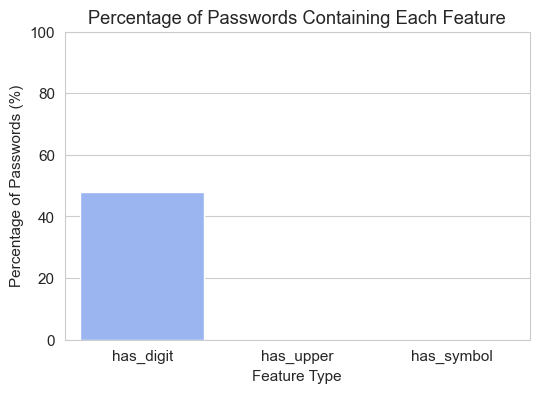

In [80]:
df[['has_upper', 'has_digit', 'has_symbol']].sum() / len(df) * 100

feature_presence = (
    df[['has_upper', 'has_digit', 'has_symbol']]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
sns.barplot(x=feature_presence.index, y=feature_presence.values, palette="coolwarm")
plt.title("Percentage of Passwords Containing Each Feature")
plt.ylabel("Percentage of Passwords (%)")
plt.xlabel("Feature Type")
plt.ylim(0, 100)
plt.show()

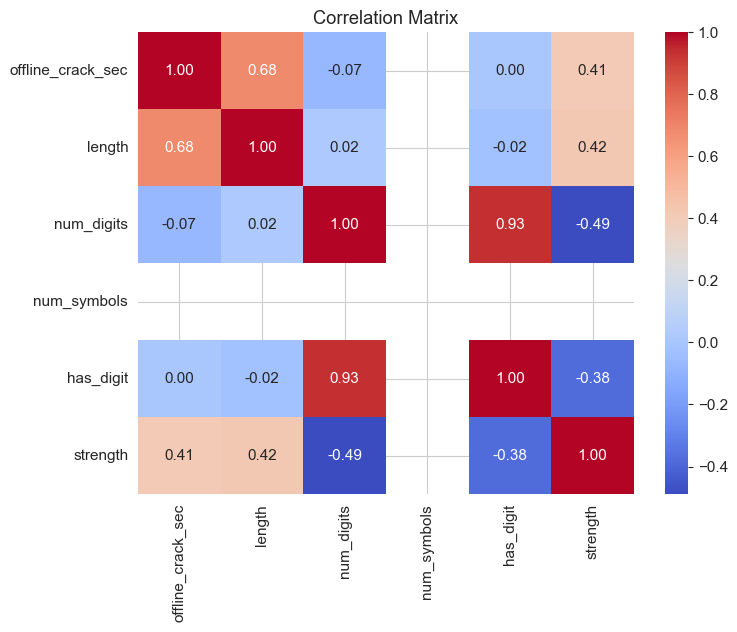

In [81]:
corr = df[['offline_crack_sec', 'length', 'num_digits', 'num_symbols','has_digit', 'strength']].corr()
plt.figure(figsize=[8,6])
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

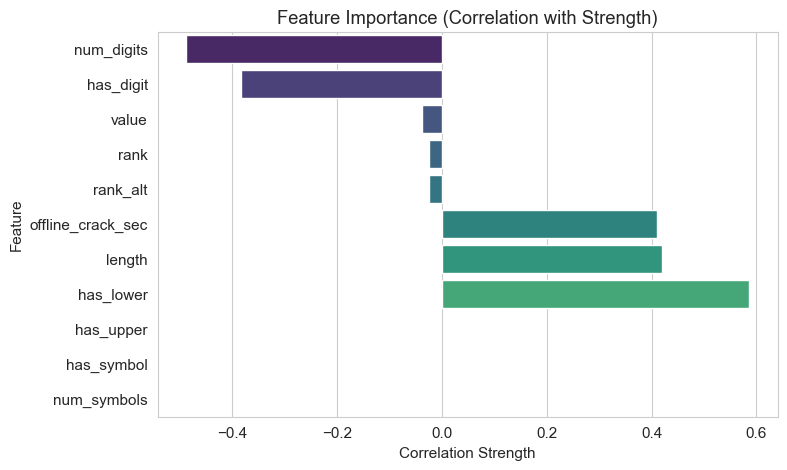

In [82]:
corr_with_target = (
    df.corr(numeric_only=True)['strength']
    .drop('strength')
    .sort_values(ascending=True)
)



plt.figure(figsize=(8,5))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="viridis")
plt.title("Feature Importance (Correlation with Strength)")
plt.xlabel("Correlation Strength")
plt.ylabel("Feature")
plt.show()

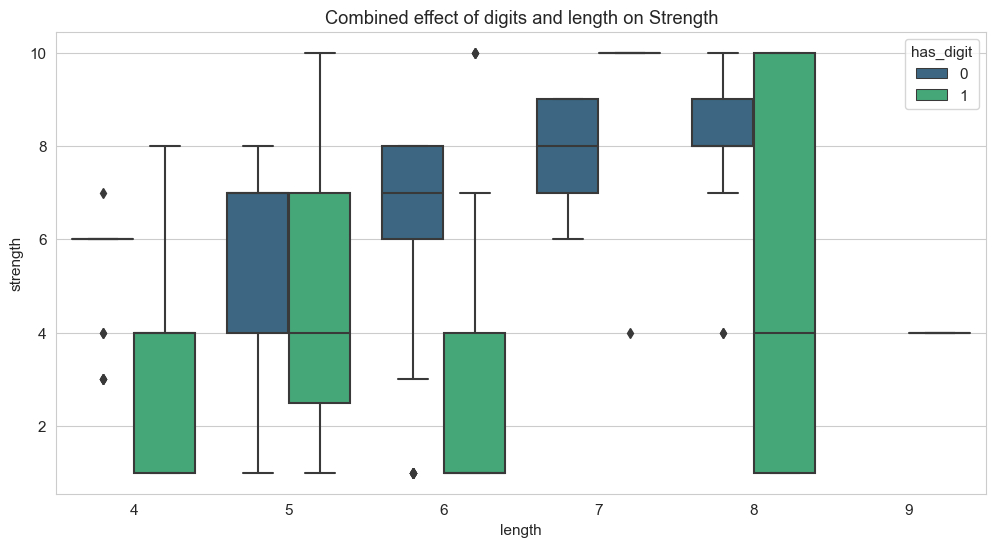

In [83]:
sns.boxplot(
    x='length', y='strength',
    hue='has_digit', data=df,
    palette='viridis'
)
plt.title('Combined effect of digits and length on Strength')
plt.show()

In [84]:
X = df[['rank', 'length', 'num_digits', 'has_digit', 'has_lower']]
y = df['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_

for name, imp in sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True):
    print(f"{name:15s}: {imp:.3f}")
    
print('='*70)
y_pred = model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

rank           : 0.436
has_lower      : 0.356
length         : 0.157
num_digits     : 0.032
has_digit      : 0.019
R² Score: 0.450
MAE: 1.07


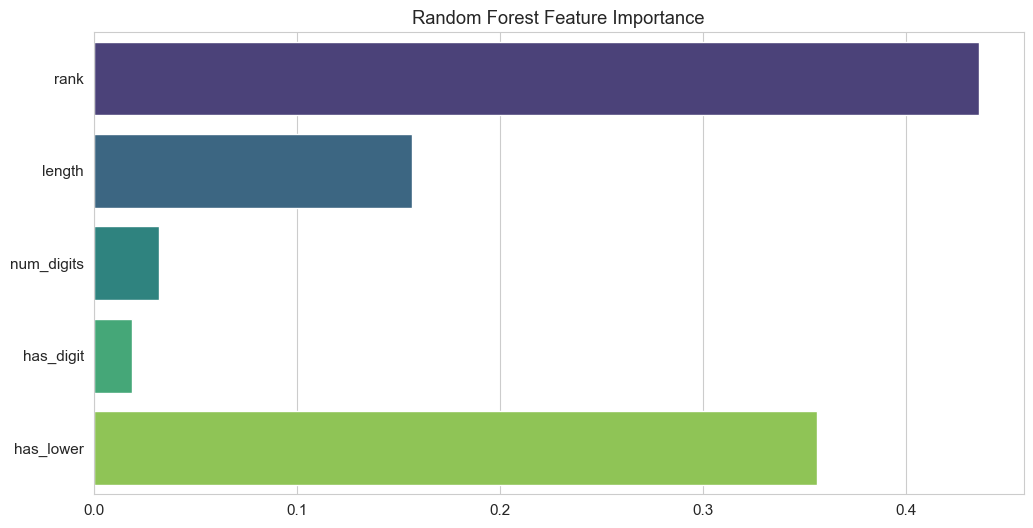

In [85]:
sns.barplot(x=model.feature_importances_, y=X.columns, orient='h', palette='viridis')
plt.title("Random Forest Feature Importance")
plt.show()

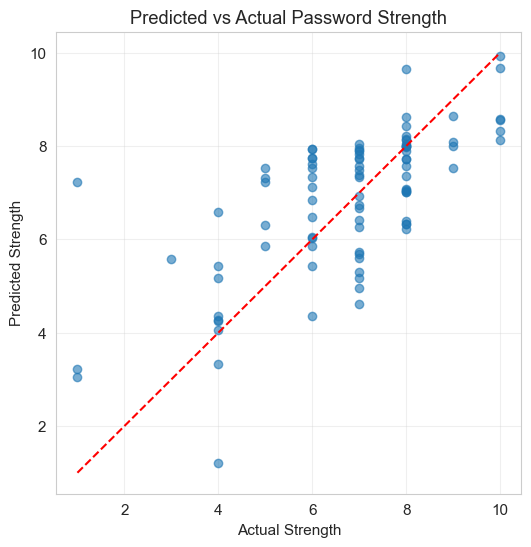

In [86]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Predicted vs Actual Password Strength")
plt.grid(True, alpha=0.3)
plt.show()

In [87]:
X = df[['length', 'num_digits', 'has_digit', 'has_lower']]
y = df['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_

for name, imp in sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True):
    print(f"{name:15s}: {imp:.3f}")
    
print('='*70)
y_pred = model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

has_lower      : 0.624
length         : 0.269
num_digits     : 0.073
has_digit      : 0.034
R² Score: 0.545
MAE: 0.95


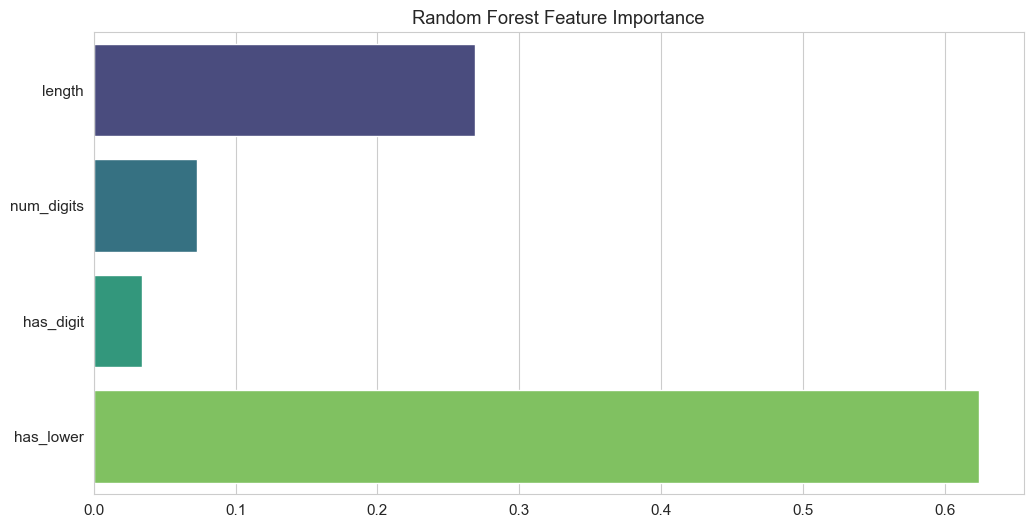

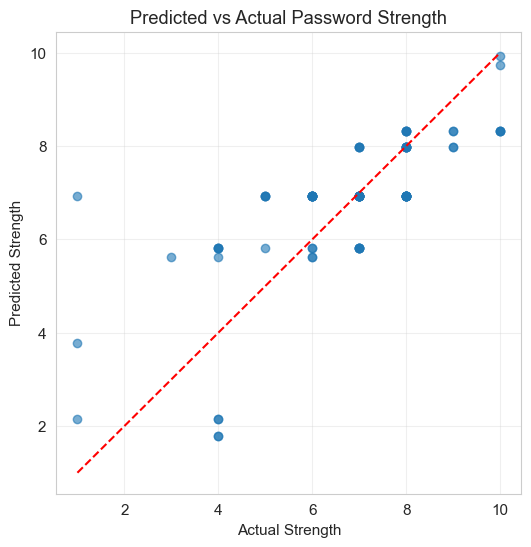

In [88]:
sns.barplot(x=model.feature_importances_, y=X.columns, orient='h', palette='viridis')
plt.title("Random Forest Feature Importance")
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Predicted vs Actual Password Strength")
plt.grid(True, alpha=0.3)
plt.show()